In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_csv_data = pd.read_csv("/Users/sunwen/Desktop/JR_PCM_Entitlement_INV_BO_Analytics_UCLA.csv")

# raw_csv_data = pd.read_csv("C:/data/JR_PCM_Entitlement_INV_BO_Analytics_UCLA.csv"

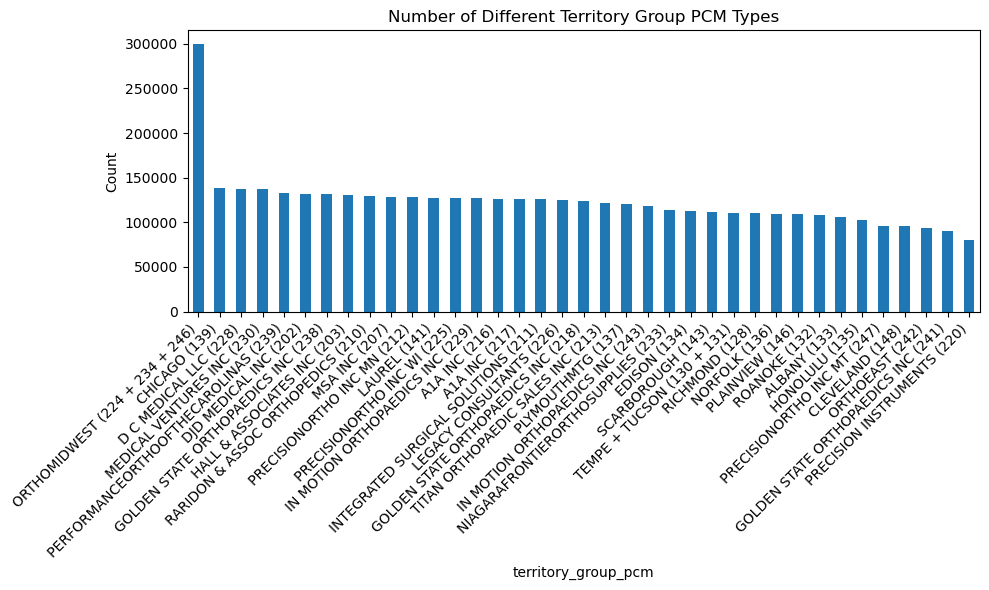

In [4]:
territory_counts = raw_csv_data['territory_group_pcm'].value_counts()

# Create a bar chart
plt.figure(figsize = (10, 6))
territory_counts.plot(kind = 'bar')
plt.xlabel('territory_group_pcm')
plt.ylabel('Count')
plt.title('Number of Different Territory Group PCM Types')
plt.xticks(rotation = 45, ha = 'right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
#unique territory types
unique_territory_count = raw_csv_data['territory_group_pcm'].nunique()
print(f"Number of unique territory_group_pcm counts: {unique_territory_count}")

Number of unique territory_group_pcm counts: 37


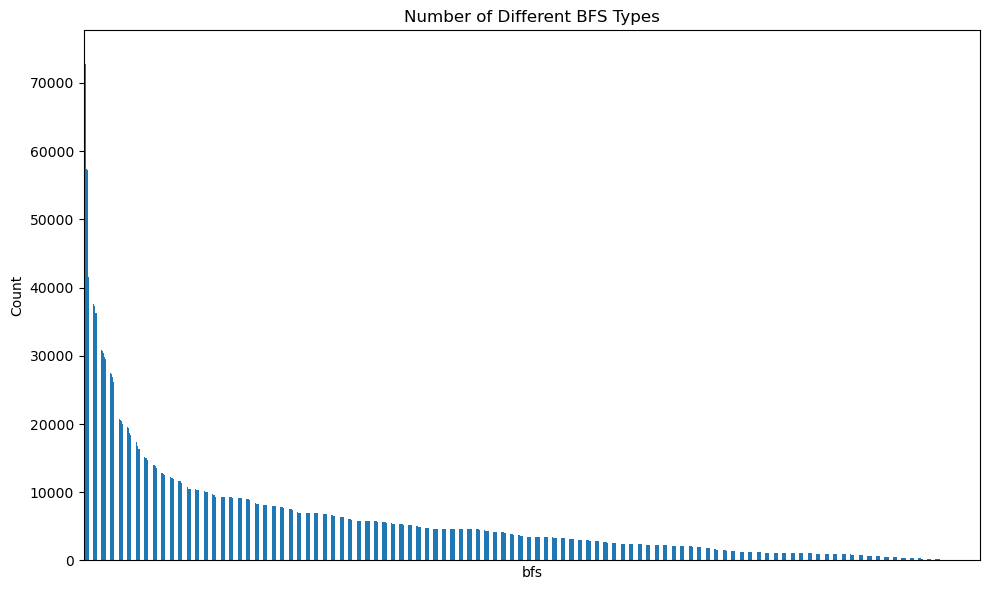

In [6]:
# Count the occurrences of each bfs
bfs_counts = raw_csv_data['bfs'].value_counts()

# Create a vertical bar chart
plt.figure(figsize = (10, 6))
bfs_counts.plot(kind = 'bar')
plt.xlabel('bfs')
plt.ylabel('Count')
plt.title('Number of Different BFS Types')

# Remove x-axis labels
plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()

In [7]:
#unique bfs types number
unique_bfs_count = raw_csv_data['bfs'].nunique()
print(f"Number of unique BFS counts: {unique_bfs_count}")

Number of unique BFS counts: 791


In [8]:
#delete useless columns
cols = ['Product Line', 'Left / Right', 'Capture Date', 'Parent','P2 Parent Description','office_name', 'bfs_description', 'case_type', 'procedure_type', 'territory_group_to_display_together', 'rag_color_code', 'color_coding_new']
cleaned_csv_data = raw_csv_data.drop(cols, axis = 1)

In [9]:
cleaned_csv_data.head()

,NTS_Units,Orders on Territory,Orders on DC,Grouped_Territory_Set_Count,Size,Component Type,Instument / Implant,Brand,Week#,Month,...,excess_layers_vs_pcm_ter,layers_below_pcm_ter_pivot,excess_layers_vs_pcm_ter_pivot,sku_below_pcm_due_to_bo_units,sku_excess_vs_pcm_units,bfs_sales_units,weekly_sales_units,weekly_bfs_sales_units,weeks_of_supply_w_bfs_sales,area_name
0,0,0,0,0,129416712,Other Non Focus,IMPLANT,LCS,13,3,...,0,0,0,0,2,3,0.000000,0.057692,34.666670,Northeast
1,0,0,1,2,32IDX74OD,Liner,IMPLANT,PINNACLE,14,4,...,2,0,0,0,2,0,0.000000,0.000000,10.000000,North Atlantic
2,0,0,0,0,197731240,Other Non Focus,IMPLANT,RECLAIM,27,7,...,0,0,0,1,0,11,0.000000,0.211538,9.454545,West
3,1,0,0,0,8,Stem,IMPLANT,CORAIL,30,7,...,0,0,0,0,0,1,0.019231,0.019231,52.000000,North Atlantic
4,0,0,0,0,Z 5 12MM,Tibial Tray,IMPLANT,ATTUNE,28,7,...,0,0,0,0,1,0,0.000000,0.000000,10.000000,West


In [10]:
#separate core and outlier data
core_data = cleaned_csv_data[cleaned_csv_data['core_size'] == 'Core']
outlier_data = cleaned_csv_data[cleaned_csv_data['core_size'] == 'Outlier']

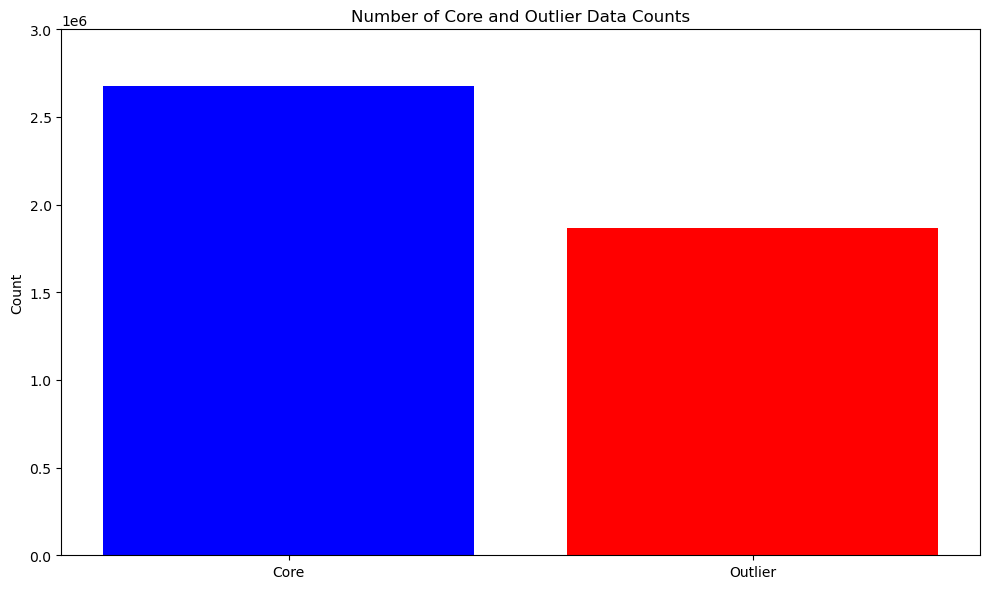

In [11]:
core_data_count = core_data.shape[0]
outlier_data_count = outlier_data.shape[0]

# Create a vertical bar chart
plt.figure(figsize = (10, 6))
plt.bar(['Core', 'Outlier'], [core_data_count, outlier_data_count], color = ['blue', 'red'])
plt.ylabel('Count')
plt.title('Number of Core and Outlier Data Counts')

plt.tight_layout()
plt.ylim(0, 3e6)

# Show the plot
plt.show()

In [12]:
core_data_territory_simple = core_data[['Size', 'Brand', 'Component Type', 'territory_group_pcm', 'Week#', 'Month', 'bfs', 'layers_pivot', 'layers_left_pivot', 'layers_down_pivot', 'item_description', 'sales_units', 'weekly_bfs_sales_units', 'inventory_total_units', 'backorder_units', 'total_units', 'base_sets', 'layers', 'pcm_entitled_full_2nd_max_layers', 'pcm_entitled_full_by_sku_units', 'pcm_entitled_full_2nd_max_layers_pivot', 'weeks_of_supply_w_bfs_sales', 'area_name']]
outlier_data_territory_simple = outlier_data[['Size', 'Brand', 'Component Type', 'territory_group_pcm', 'Week#', 'Month', 'bfs', 'layers_pivot', 'layers_left_pivot', 'layers_down_pivot', 'item_description', 'sales_units', 'weekly_bfs_sales_units', 'inventory_total_units', 'backorder_units', 'total_units', 'base_sets', 'layers', 'pcm_entitled_full_2nd_max_layers', 'pcm_entitled_full_by_sku_units', 'pcm_entitled_full_2nd_max_layers_pivot', 'weeks_of_supply_w_bfs_sales', 'area_name']]

In [13]:
core_data_territory_simple.head()

,Size,Brand,Component Type,territory_group_pcm,Week#,Month,bfs,layers_pivot,layers_left_pivot,layers_down_pivot,...,inventory_total_units,backorder_units,total_units,base_sets,layers,pcm_entitled_full_2nd_max_layers,pcm_entitled_full_by_sku_units,pcm_entitled_full_2nd_max_layers_pivot,weeks_of_supply_w_bfs_sales,area_name
4,Z 5 12MM,ATTUNE,Tibial Tray,HONOLULU (135),28,7,MB/AC/A - NA - Core,0,0,0,...,1,0,1,0,0,0,0,0,10.0,West
5,520048195,INHANCE,Other Non Focus,NORFOLK (136),31,8,O/BX/AD - NA - Core,0,0,0,...,8,0,8,1,8,0,0,0,10.0,North Atlantic
9,129456136,MBT,Other Non Focus,HONOLULU (135),13,3,M/AB/G - NA - Core,0,0,0,...,2,0,2,1,2,5,5,0,52.0,West
11,129405517,LCS,Other Non Focus,A1A INC (216),1,1,M/AA/BA - NA - Core,0,0,0,...,2,0,2,1,2,0,0,0,52.0,West
14,16,CORAIL,Stem,PRECISIONORTHO INC MT (247),13,3,A/HA/DA 135 HIGH OFF COLLAR - NA - Core,0,0,0,...,3,0,3,2,3,1,1,0,78.0,North Central


In [14]:
core_data_territory_simple['territory_group_pcm'].nunique()

37

In [15]:
territory_idx = pd.DataFrame(core_data_territory_simple['territory_group_pcm'])
for i in range(len(territory_idx)):
    idx1 = territory_idx.iloc[i]['territory_group_pcm'].index('(')
    idx2 = territory_idx.iloc[i]['territory_group_pcm'].index(')')
    if idx2 - idx1 == 4:
        temp = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 1: idx2])
    elif idx2 - idx1 == 10:
        num1 = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 1: idx1 + 4])
        num2 = int(territory_idx.iloc[i]['territory_group_pcm'][idx2 - 3: idx2])
        temp = num1 + num2
    else:
        num1 = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 1: idx1 + 4])
        num2 = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 7: idx2 - 6])
        num3 = int(territory_idx.iloc[i]['territory_group_pcm'][idx2 - 3: idx2])
        temp = num1 + num2 + num3
    territory_idx.iloc[i]['territory_group_pcm'] = temp
core_data_territory_simple['territory'] = territory_idx

/var/folders/ym/260cb48n12lc3mdfj9_b7fzm0000gn/T/ipykernel_1131/3723821969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data_territory_simple['territory'] = territory_idx


In [16]:
core_data_territory_simple.head()

,Size,Brand,Component Type,territory_group_pcm,Week#,Month,bfs,layers_pivot,layers_left_pivot,layers_down_pivot,...,backorder_units,total_units,base_sets,layers,pcm_entitled_full_2nd_max_layers,pcm_entitled_full_by_sku_units,pcm_entitled_full_2nd_max_layers_pivot,weeks_of_supply_w_bfs_sales,area_name,territory
4,Z 5 12MM,ATTUNE,Tibial Tray,HONOLULU (135),28,7,MB/AC/A - NA - Core,0,0,0,...,0,1,0,0,0,0,0,10.0,West,135
5,520048195,INHANCE,Other Non Focus,NORFOLK (136),31,8,O/BX/AD - NA - Core,0,0,0,...,0,8,1,8,0,0,0,10.0,North Atlantic,136
9,129456136,MBT,Other Non Focus,HONOLULU (135),13,3,M/AB/G - NA - Core,0,0,0,...,0,2,1,2,5,5,0,52.0,West,135
11,129405517,LCS,Other Non Focus,A1A INC (216),1,1,M/AA/BA - NA - Core,0,0,0,...,0,2,1,2,0,0,0,52.0,West,216
14,16,CORAIL,Stem,PRECISIONORTHO INC MT (247),13,3,A/HA/DA 135 HIGH OFF COLLAR - NA - Core,0,0,0,...,0,3,2,3,1,1,0,78.0,North Central,247


In [17]:
#display deployed sets
deployed_sets_all = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['layers_pivot'].max().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(deployed_sets_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
#display available sets
available_sets_all = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['layers_left_pivot'].max().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(available_sets_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
#display entitled sets
entitled_sets_all = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['pcm_entitled_full_2nd_max_layers_pivot'].max().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(entitled_sets_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
inventory_total_units = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['inventory_total_units'].sum().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(inventory_total_units)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
sales_total_units = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['sales_units'].sum().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(sales_total_units)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weeks_of_supply_w_bfs_sales']
core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weekly_supply_bfs_sales'].round().astype(int)
weekly_bfs_sales = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['weekly_supply_bfs_sales'].sum().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(weekly_bfs_sales)

/var/folders/ym/260cb48n12lc3mdfj9_b7fzm0000gn/T/ipykernel_1131/2466651659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weeks_of_supply_w_bfs_sales']
/var/folders/ym/260cb48n12lc3mdfj9_b7fzm0000gn/T/ipykernel_1131/2466651659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weekly_supply_bfs_sales'].round().astype(int)
IOPub data rat

In [56]:
# Combine the columns from the three DataFrames
combined_df = pd.concat([deployed_sets_all, available_sets_all, entitled_sets_all, sales_total_units, weekly_bfs_sales], axis = 1)

combined_df['area'] = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys=True)['area_name'].first().values

# Only keep unique columns
combined_df_unique = combined_df.loc[:, ~combined_df.columns.duplicated()]

# Print the updated combined DataFrame
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3):
    print(combined_df_unique)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
combined_df_without_area = pd.concat([deployed_sets_all, available_sets_all, entitled_sets_all, sales_total_units, weekly_bfs_sales], axis = 1)
combined_df_without_area_unique = combined_df_without_area.loc[:, ~combined_df_without_area.columns.duplicated()]
combined_df_without_area_unique.head()

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   

                                    sales_units  weekly_supply_bfs_sales  
territory Week# bfs                                                       
128       1     A/B/K - NA - Core            33                       81  
                A/B/L - NA - Core            40                       64  
                A/G/AA - NA - Core          193                       33  
                A/G/AB - NA - Core          209                       25  
                A/G/AC - NA - Core           18                       90

In [58]:
#try to change variables into numerical values:

# Get unique area values and their corresponding numerical codes
area_codes, area_labels = pd.factorize(combined_df_unique['area'])

# Add a new column "area_code" with the numerical codes
combined_df_unique['area_code'] = area_codes

combined_df_unique.head(10)

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   
                A/G/AD - NA - Core             5                  5   
                A/G/AE - NA - Core            16                 16   
                A/G/AF - NA - Core            15                 15   
                A/G/AG - NA - Core            10                 10   
                A/G/AH - NA - Core             9                  9   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   
                A/G/AD - NA - Core                                       4   
                A/G/AE - NA - Core                                      16   
                A/G/AF - NA - Core                                      12   
                A/G/AG - NA - Core                                      11   
                A/G/AH - NA - Core                                      10   

                                    sales_units  weekly_supply_bfs_sales  \
territory Week# bfs                                                        
128       1     A/B/K - NA - Core            33                       81   
                A/B/L - NA - Core            40                       64   
                A/G/AA - NA - Core          193                       33   
                A/G/AB - NA - Core          209                       25   
                A/G/AC - NA - Core           18                       90   
                A/G/AD - NA - Core           21                       75   
                A/G/AE - NA - Core           66                       61   
                A/G/AF - NA - Core           41                       95   
                A/G/AG - NA - Core           66                       31   
                A/G/AH - NA - Core           35                       57   

                                              area  area_code  
territory Week# bfs                                            
128       1     A/B/K - NA - Core   North Atlantic          0  
                A/B/L - NA - Core   North Atlantic          0  
                A/G/AA - NA - Core  North Atlantic          0  
                A/G/AB - NA - Core  North Atlantic          0  
                A/G/AC - NA - Core  North Atlantic          0  
                A/G/AD - NA - Core  North Atlantic          0  
                A/G/AE - NA - Core  North Atlantic          0  
                A/G/AF - NA - Core  North Atlantic          0  
                A/G/AG - NA - Core  North Atlantic          0  
                A/G/AH - NA - Core  North Atlantic          0

In [59]:
combined_df_all_unique = pd.concat([combined_df_unique, inventory_total_units], axis = 1)
combined_df_all_unique = combined_df_all_unique.loc[:, ~combined_df_all_unique.columns.duplicated()]
combined_df_all_unique.head()

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   

                                    sales_units  weekly_supply_bfs_sales  \
territory Week# bfs                                                        
128       1     A/B/K - NA - Core            33                       81   
                A/B/L - NA - Core            40                       64   
                A/G/AA - NA - Core          193                       33   
                A/G/AB - NA - Core          209                       25   
                A/G/AC - NA - Core           18                       90   

                                              area  area_code  \
territory Week# bfs                                             
128       1     A/B/K - NA - Core   North Atlantic          0   
                A/B/L - NA - Core   North Atlantic          0   
                A/G/AA - NA - Core  North Atlantic          0   
                A/G/AB - NA - Core  North Atlantic          0   
                A/G/AC - NA - Core  North Atlantic          0   

                                    inventory_total_units  
territory Week# bfs                                        
128       1     A/B/K - NA - Core                      53  
                A/B/L - NA - Core                      48  
                A/G/AA - NA - Core                    121  
                A/G/AB - NA - Core                    108  
                A/G/AC - NA - Core                     32

In [60]:
combined_df_all_without_area_unique = pd.concat([combined_df_without_area_unique, inventory_total_units], axis = 1)
combined_df_all_without_area_unique = combined_df_all_without_area_unique.loc[:, ~combined_df_all_without_area_unique.columns.duplicated()]
combined_df_all_without_area_unique.head()

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   

                                    sales_units  weekly_supply_bfs_sales  \
territory Week# bfs                                                        
128       1     A/B/K - NA - Core            33                       81   
                A/B/L - NA - Core            40                       64   
                A/G/AA - NA - Core          193                       33   
                A/G/AB - NA - Core          209                       25   
                A/G/AC - NA - Core           18                       90   

                                    inventory_total_units  
territory Week# bfs                                        
128       1     A/B/K - NA - Core                      53  
                A/B/L - NA - Core                      48  
                A/G/AA - NA - Core                    121  
                A/G/AB - NA - Core                    108  
                A/G/AC - NA - Core                     32

In [61]:
combined_df_unique.to_csv('combined_df_unique.csv', index = False)
combined_df_without_area_unique.to_csv('combined_df_without_area_unique.csv', index = False)
combined_df_all_unique.to_csv('combined_df_all_unique.csv', index = False)
combined_df_all_without_area_unique.to_csv('combined_df_all_without_area_unique.csv', index = False)

In [143]:
from sklearn.model_selection import cross_val_score, train_test_split
from keras.models import Sequential
from keras.layers import LSTM,Dense
import numpy as np
from tensorflow.keras.layers import Embedding, Flatten
import tensorflow as tf

In [144]:
from sklearn.preprocessing import OneHotEncoder
combined_df_all_unique = combined_df_all_unique.reset_index()

import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'your_categorical_column' is the name of the column containing your categorical data
encoder = LabelEncoder()
combined_df_all_unique['bfs'] = encoder.fit_transform(combined_df_all_unique['bfs'])

# Convert the Series to a NumPy array and reshape it
combined_df_all_unique['bfs'] = combined_df_all_unique['bfs'].values.reshape(-1, 1)


In [145]:
train_out, test_out = train_test_split(combined_df_all_unique, test_size=0.1, random_state=42)
# train_out = train_out.reset_index()
# test_out = test_out.reset_index()

In [146]:
train_x = train_out[['territory','Week#','bfs', 'layers_pivot', 'layers_left_pivot', 'pcm_entitled_full_2nd_max_layers_pivot','weekly_supply_bfs_sales', "inventory_total_units", "area_code"]]
test_x = test_out[['territory','Week#', 'bfs', 'layers_pivot', 'layers_left_pivot', 'pcm_entitled_full_2nd_max_layers_pivot','weekly_supply_bfs_sales', "inventory_total_units",'area_code']]
train_y = train_out[['sales_units']]
test_y = test_out[['sales_units']]
train_x = np.reshape(np.array(train_x), (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(np.array(test_x), (test_x.shape[0], 1, test_x.shape[1]))

In [147]:
# print(train_x.shape)
# print(test_x.shape)
# train_x_reshaped = train_x.reshape(train_x.shape[0], 1, train_x.shape[2])
# test_x_reshaped = test_x.reshape(test_x.shape[0], 1, test_x.shape[2])

In [148]:
from sklearn.preprocessing import MinMaxScaler

# Flatten your 3D training data to 2D
train_x_2d = train_x.reshape(train_x.shape[0], -1)


# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on your flattened training data and transform it
train_x_normalized = scaler.fit_transform(train_x_2d)
# train_y_normalized = scaler.fit_transform(train_y)

# Flatten and transform your test/validation data using the same scaler
test_x_2d = test_x.reshape(test_x.shape[0], -1)
test_x_normalized = scaler.transform(test_x_2d)
# test_y_2d = test_y.reshape(test_y.shape[0], -1)
# test_y_normalized = scaler.transform(test_y_2d)
scaler_y = MinMaxScaler()
train_y_scaled = scaler_y.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = scaler_y.transform(test_y.values.reshape(-1, 1))

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

# Reshape the input data to have a time step dimension of 1
model.add(LSTM(50, return_sequences=False, input_shape=(1,train_x_normalized.shape[1]), activation='relu'))

# Add additional dense layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='linear'))  # Assuming this is a regression task

opt = tf.keras.optimizers.Adam(lr=0.001)

# # Reshape your input data for LSTM with one time step
train_x_reshaped = train_x_normalized.reshape(train_x_normalized.shape[0], 1, train_x_normalized.shape[1])
test_x_reshaped = test_x_normalized.reshape(test_x_normalized.shape[0], 1, test_x_normalized.shape[1])

from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    return 0.001 * (0.9 ** epoch)  # Adjust the parameters as needed

lr_callback = LearningRateScheduler(lr_scheduler)

model.compile(loss='mse', optimizer=opt)
history = model.fit(train_x_reshaped, train_y_scaled, epochs=20, callbacks=[lr_callback], validation_data=(test_x_reshaped, test_y))

# Get loss and accuracy on the test set
loss = model.evaluate(test_x_reshaped, test_y_scaled)

print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/20
9012/9012 [==============================] - 6s 664us/step - loss: 5.6814e-04 - val_loss: 407368.0312 - lr: 0.0010
Epoch 2/20
9012/9012 [==============================] - 6s 649us/step - loss: 4.0489e-04 - val_loss: 407370.4688 - lr: 9.0000e-04
Epoch 3/20
9012/9012 [==============================] - 6s 658us/step - loss: 3.5235e-04 - val_loss: 407366.4062 - lr: 8.1000e-04
Epoch 4/20
9012/9012 [==============================] - 6s 647us/step - loss: 3.1601e-04 - val_loss: 407357.1250 - lr: 7.2900e-04
Epoch 5/20
9012/9012 [==============================] - 6s 646us/step - loss: 2.9114e-04 - val_loss: 407363.8125 - lr: 6.5610e-04
Epoch 6/20
9012/9012 [==============================] - 6s 647us/step - loss: 2.6823e-04 - val_loss: 407362.0938 - lr: 5.9049e-04
Epoch 7/20
9012/9012 [==============================] - 6s 646us/step - loss: 2.5249e-04 - val_loss: 407356.5312 - lr: 5.3144e-04
Epoch 8/20
9012/9012 [==============================] - 6s 647us/step - loss: 2.4588e-04 - val

In [150]:
from sklearn.metrics import mean_squared_error
# Reshape your test data to have a time step dimension of 1
test_x_reshaped = test_x_normalized.reshape(test_x_normalized.shape[0], 1, test_x_normalized.shape[1])

# Make predictions using the reshaped test data
predictions = model.predict(test_x_reshaped)

# Calculate RMSE
mse = mean_squared_error(test_y_scaled, predictions)
rmse = np.sqrt(mse)

print(f'Root Mean Square Error (RMSE): {rmse}')

1002/1002 [==============================] - 0s 236us/step
Root Mean Square Error (RMSE): 0.007293266568269897


In [151]:
# Calculate MAPE
def calculate_mape(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape
test_y_scaled_1 = test_y_scaled+1
mape = calculate_mape(test_y_scaled_1, predictions)

# Convert MAPE to a float and then format it
formatted_mape = "{:.2f}".format(float(mape))

print(f'Mean Absolute Percentage Error (MAPE): {formatted_mape}%')

Mean Absolute Percentage Error (MAPE): 98.76%


In [152]:
## Easy LSTM

In [153]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have already loaded your train and test data
# train_x, test_x, train_y, test_y = load_data()


# Define the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(50, activation='relu', input_shape = (1,train_x_normalized.shape[1])))
model.add(keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

# Train the model
model.fit(train_x_reshaped, train_y_scaled, epochs=50, batch_size=32)

# Make predictions on the test data
predicted_y_scaled = model.predict(test_x_reshaped)

# Inverse scale the predictions to get the actual values
predicted_y = scaler_y.inverse_transform(predicted_y_scaled)

# Evaluate the model
mse = mean_squared_error(test_y_scaled, predicted_y_scaled)
print("Mean Squared Error:", mse)


Epoch 1/50
9012/9012 [==============================] - 5s 508us/step - loss: 4.7456e-04
Epoch 2/50
9012/9012 [==============================] - 5s 505us/step - loss: 3.2014e-04
Epoch 3/50
9012/9012 [==============================] - 5s 506us/step - loss: 2.5346e-04
Epoch 4/50
9012/9012 [==============================] - 5s 503us/step - loss: 2.1349e-04
Epoch 5/50
9012/9012 [==============================] - 5s 510us/step - loss: 1.8028e-04
Epoch 6/50
9012/9012 [==============================] - 5s 505us/step - loss: 1.5211e-04
Epoch 7/50
9012/9012 [==============================] - 5s 507us/step - loss: 1.3166e-04
Epoch 8/50
9012/9012 [==============================] - 5s 509us/step - loss: 1.1479e-04
Epoch 9/50
9012/9012 [==============================] - 5s 510us/step - loss: 1.0336e-04
Epoch 10/50
9012/9012 [==============================] - 5s 510us/step - loss: 9.2379e-05
Epoch 11/50
9012/9012 [==============================] - 5s 509us/step - loss: 8.3113e-05
Epoch 12/50
9012/90

In [154]:
from sklearn.metrics import mean_squared_error
# Reshape your test data to have a time step dimension of 1
test_x_reshaped = test_x_normalized.reshape(test_x_normalized.shape[0], 1, test_x_normalized.shape[1])

# Make predictions using the reshaped test data
predictions_lstm = model.predict(test_x_reshaped)

# Calculate RMSE
mse = mean_squared_error(test_y_scaled, predictions_lstm)
rmse_lstm = np.sqrt(mse)

print(f'Root Mean Square Error (RMSE): {rmse_lstm}')

1002/1002 [==============================] - 0s 231us/step
Root Mean Square Error (RMSE): 0.005651125737610465


In [155]:
# Calculate MAPE
def calculate_mape(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape
test_y_scaled_2 = test_y_scaled+1
mape = calculate_mape(test_y_scaled_2, predictions_lstm)

# Convert MAPE to a float and then format it
formatted_mape = "{:.2f}".format(float(mape))

print(f'Mean Absolute Percentage Error (MAPE): {formatted_mape}%')

Mean Absolute Percentage Error (MAPE): 98.88%


Mean Squared Error: 3.193522210228342e-05


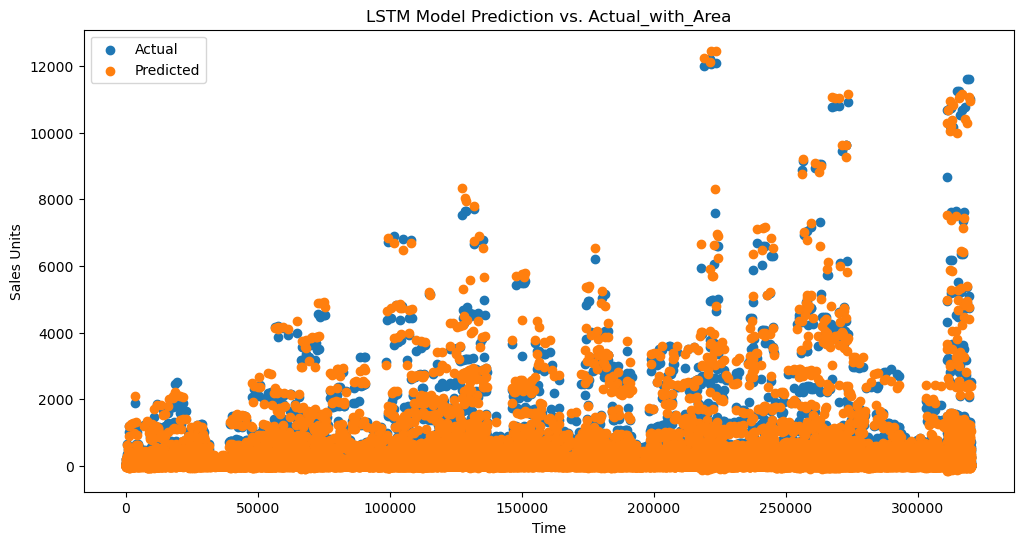

In [156]:

# Evaluate the model
mse = mean_squared_error(test_y_scaled, predicted_y_scaled)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(test_y.index, scaler_y.inverse_transform(test_y_scaled), label='Actual')
plt.scatter(test_y.index, predicted_y, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sales Units')
plt.title('LSTM Model Prediction vs. Actual_with_Area')
plt.show()


In [157]:
mse

3.193522210228342e-05

1002/1002 [==============================] - 0s 231us/step
Epoch 1/50, Mean Squared Error: 0.00704947594500003
1002/1002 [==============================] - 0s 230us/step
Epoch 2/50, Mean Squared Error: 0.005264877017672952
1002/1002 [==============================] - 0s 229us/step
Epoch 3/50, Mean Squared Error: 0.005333670019325368
1002/1002 [==============================] - 0s 231us/step
Epoch 4/50, Mean Squared Error: 0.005556235859648899
1002/1002 [==============================] - 0s 231us/step
Epoch 5/50, Mean Squared Error: 0.005680172271414893
1002/1002 [==============================] - 0s 231us/step
Epoch 6/50, Mean Squared Error: 0.00634208541582669
1002/1002 [==============================] - 0s 231us/step
Epoch 7/50, Mean Squared Error: 0.005270153406709112
1002/1002 [==============================] - 0s 233us/step
Epoch 8/50, Mean Squared Error: 0.0051298655781406135
1002/1002 [==============================] - 0s 231us/step
Epoch 9/50, Mean Squared Error: 0.005803980208

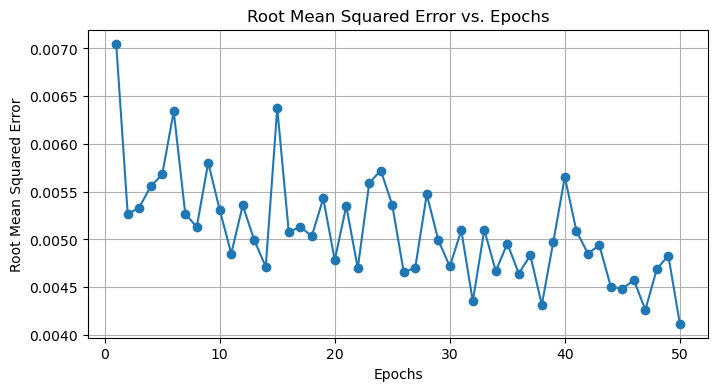

In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize lists to store MSE and epochs
rmse_history = []
epochs = 50  # Change this to your desired number of epochs

for epoch in range(epochs):
    # Train the model for one epoch
    model.fit(train_x_reshaped, train_y_scaled, epochs=1, batch_size=32, verbose=0)
    
    # Make predictions on the test data
    predicted_y_scaled = model.predict(test_x_reshaped)
    
    # Inverse scale the predictions to get the actual values
    predicted_y = scaler_y.inverse_transform(predicted_y_scaled)
    
    # Calculate and store the MSE
    rmse = np.sqrt(mean_squared_error(test_y_scaled, predicted_y_scaled))
    rmse_history.append(rmse)
    
    # Print the MSE for this epoch
    print(f"Epoch {epoch+1}/{epochs}, Mean Squared Error: {rmse}")

# Plot the MSE history
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, epochs+1), rmse_history, marker='o', linestyle='-')
plt.title('Root Mean Squared Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()


In [ ]:
## different lr

In [131]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

rmse_values = []

for learning_rate in learning_rates:
    # Define and compile the model with the current learning rate
    model = keras.Sequential()
    model.add(keras.layers.LSTM(50, activation='relu', input_shape=(1, train_x_normalized.shape[1])))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # Train the model
    model.fit(train_x_reshaped, train_y_scaled, epochs=50, batch_size=32, verbose=0)
    
    # Make predictions on the test data
    predicted_y_scaled = model.predict(test_x_reshaped)
    
    # Inverse scale the predictions to get the actual values
    predicted_y = scaler_y.inverse_transform(predicted_y_scaled)
    
    # Calculate RMSE and store it
    rmse = sqrt(mean_squared_error(test_y_scaled, predicted_y_scaled))
    rmse_values.append(rmse)
    
    # Print the RMSE for this learning rate
    print(f"Learning Rate: {learning_rate}, RMSE: {rmse}")


1002/1002 [==============================] - 0s 265us/step


Learning Rate: 0.0001, RMSE: 0.010745078205676502


1002/1002 [==============================] - 0s 232us/step
Learning Rate: 0.001, RMSE: 0.005964952406666848


1002/1002 [==============================] - 0s 229us/step
Learning Rate: 0.01, RMSE: 0.0076615956201837926


1002/1002 [==============================] - 0s 232us/step
Learning Rate: 0.1, RMSE: 0.05246540469338566


1002/1002 [==============================] - 0s 230us/step
Learning Rate: 0.2, RMSE: 0.030602359249645245


1002/1002 [==============================] - 0s 230us/step
Learning Rate: 0.3, RMSE: 0.05372595009549175


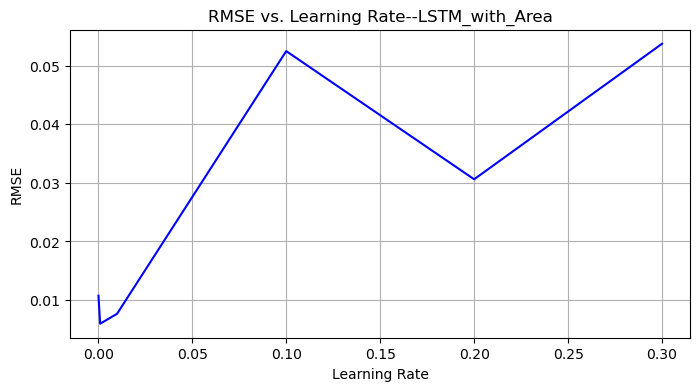

In [132]:

# Plot the RMSE values for different learning rates
plt.figure(figsize=(8, 4))
plt.plot(learning_rates, rmse_values, color = 'b')
plt.title('RMSE vs. Learning Rate--LSTM_with_Area')
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


In [133]:
## Ridege Lasso

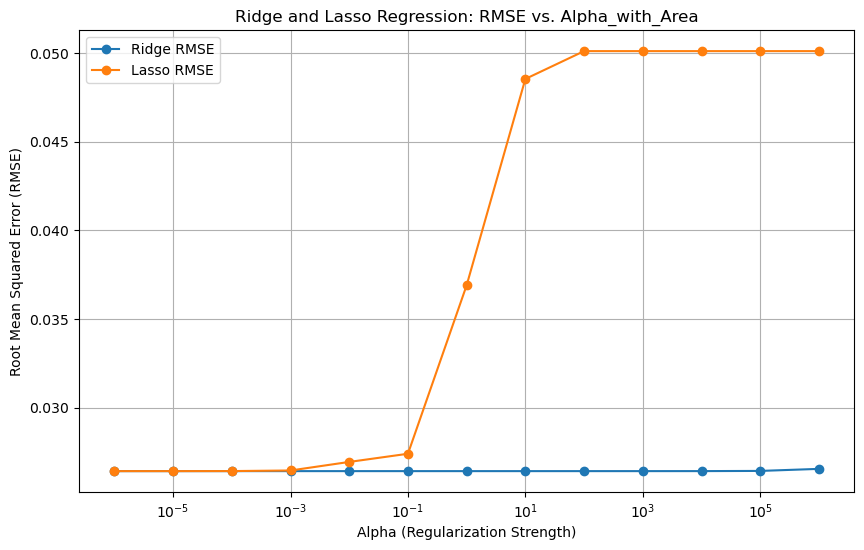

In [135]:
from sklearn.linear_model import Ridge, Lasso


alphas = np.logspace(-6, 6, 13) 


ridge_rmse_values = []
lasso_rmse_values = []

# Loop through different alpha values and fit models
# Flatten your 3D training data to 2D
train_x_2d = train_x.reshape(train_x.shape[0], -1)

train_y_scaled = scaler_y.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = scaler_y.transform(test_y.values.reshape(-1, 1))

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    
    ridge_model.fit(train_x_2d, train_y_scaled)
    lasso_model.fit(train_x_2d, train_y_scaled)
    
    ridge_predictions = ridge_model.predict(test_x_2d)
    lasso_predictions = lasso_model.predict(test_x_2d)
    
    lasso_predictions_reshaped = lasso_predictions.reshape(-1, 1)
#     lasso_predictions_original = scaler_y.inverse_transform(lasso_predictions_reshaped)

#     ridge_predictions_original = scaler_y.inverse_transform(ridge_predictions)
    
    ridge_rmse = np.sqrt(mean_squared_error(test_y_scaled, ridge_predictions))
    lasso_rmse = np.sqrt(mean_squared_error(test_y_scaled, lasso_predictions))
    
    ridge_rmse_values.append(ridge_rmse)
    lasso_rmse_values.append(lasso_rmse)
    


# Create a plot to visualize the MSE values for different alpha values
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_rmse_values, label='Ridge RMSE', marker='o')
plt.semilogx(alphas, lasso_rmse_values, label='Lasso RMSE', marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Ridge and Lasso Regression: RMSE vs. Alpha_with_Area')
plt.legend()
plt.grid(True)
plt.show()


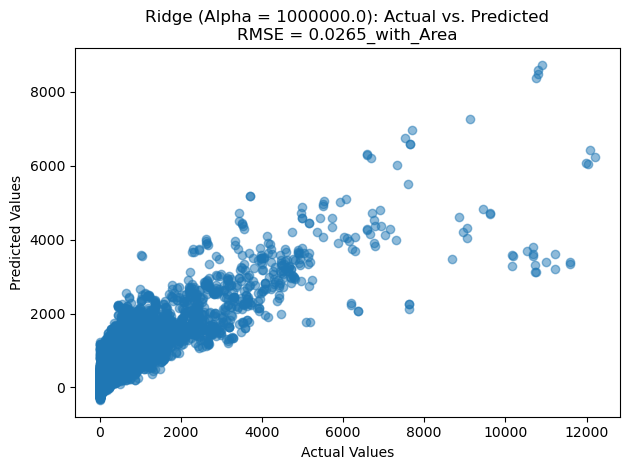

In [136]:
import matplotlib.pyplot as plt

# Define a list of different alpha values to test
alphas = 0.001

# Create a figure with multiple subplots
plt.figsize=(12, 6)

# Loop through different alpha values and create subplots

ridge_model = Ridge(alpha=alpha)
lasso_model = Lasso(alpha=alpha)

ridge_model.fit(train_x_2d, train_y_scaled)
lasso_model.fit(train_x_2d, train_y_scaled)

ridge_predictions = ridge_model.predict(test_x_2d)
lasso_predictions = lasso_model.predict(test_x_2d)


#     ridge_predictions_original = scaler_y.inverse_transform(ridge_predictions)
#     lasso_predictions_original = scaler_y.inverse_transform(lasso_predictions)

ridge_rmse = np.sqrt(mean_squared_error(test_y_scaled, ridge_predictions))
lasso_rmse = np.sqrt(mean_squared_error(test_y_scaled, ridge_predictions))

# Create a scatter plot for Ridge with the current alpha
plt.scatter(test_y, ridge_predictions_original, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Ridge (Alpha = {alpha}): Actual vs. Predicted\nRMSE = {ridge_rmse:.4f}_with_Area")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [137]:
# Calculate MAPE
def calculate_mape(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape
test_y_scaled_cnn = test_y_scaled+1
mape = calculate_mape(test_y_scaled_cnn, predictions)

# Convert MAPE to a float and then format it
formatted_mape = "{:.2f}".format(float(mape))

print(f'Mean Absolute Percentage Error (MAPE): {formatted_mape}%')

Mean Absolute Percentage Error (MAPE): 98.74%


In [ ]:
### CNN

In [138]:

# Reshape the 3D data to 2D for scaling
train_x_reshaped = train_x.reshape(train_x.shape[0], -1)
test_x_reshaped = test_x.reshape(test_x.shape[0], -1)

# Scale the features
scaler_x = MinMaxScaler()
train_x_scaled = scaler_x.fit_transform(train_x_reshaped)
test_x_scaled = scaler_x.transform(test_x_reshaped)

# Scale the target variable
scaler_y = MinMaxScaler()
train_y_scaled = scaler_y.fit_transform(train_y)
test_y_scaled = scaler_y.transform(test_y)

# Define the 1D CNN model
model = keras.Sequential()
model.add(keras.layers.Conv1D(16, kernel_size=3, activation='relu', input_shape=(9, 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_x_scaled, train_y_scaled, epochs=50, batch_size=32)

Epoch 1/50
9012/9012 [==============================] - 3s 345us/step - loss: 4.5058e-04
Epoch 2/50
9012/9012 [==============================] - 3s 335us/step - loss: 3.1901e-04
Epoch 3/50
9012/9012 [==============================] - 3s 333us/step - loss: 2.8317e-04
Epoch 4/50
9012/9012 [==============================] - 3s 350us/step - loss: 2.4305e-04
Epoch 5/50
9012/9012 [==============================] - 3s 349us/step - loss: 2.0080e-04
Epoch 6/50
9012/9012 [==============================] - 3s 351us/step - loss: 1.7646e-04
Epoch 7/50
9012/9012 [==============================] - 3s 343us/step - loss: 1.5311e-04
Epoch 8/50
9012/9012 [==============================] - 3s 332us/step - loss: 1.4203e-04
Epoch 9/50
9012/9012 [==============================] - 3s 343us/step - loss: 1.3328e-04
Epoch 10/50
9012/9012 [==============================] - 3s 334us/step - loss: 1.2603e-04
Epoch 11/50
9012/9012 [==============================] - 3s 341us/step - loss: 1.1922e-04
Epoch 12/50
9012/90

In [139]:
from sklearn.metrics import mean_squared_error
# Reshape your test data to have a time step dimension of 1
test_x_reshaped = test_x_normalized.reshape(test_x_normalized.shape[0], 1, test_x_normalized.shape[1])

# Make predictions using the reshaped test data
predictions = model.predict(test_x_scaled)

# Calculate RMSE
mse = mean_squared_error(test_y_scaled, predictions)
rmse_cnn = np.sqrt(mse)

print(f'Root Mean Square Error (RMSE): {rmse_cnn}')

1002/1002 [==============================] - 0s 196us/step
Root Mean Square Error (RMSE): 0.004999856009426153


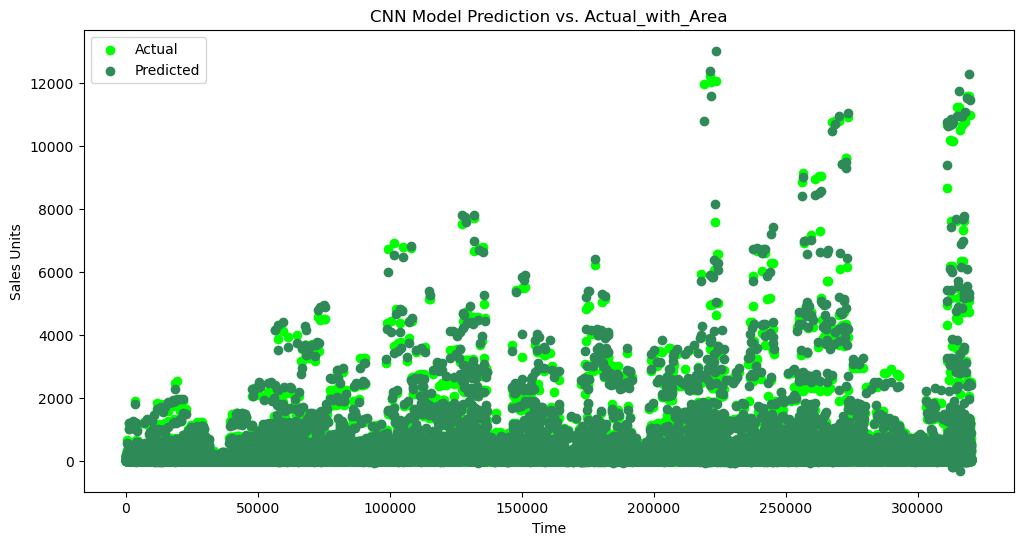

In [140]:

# Inverse scale the predictions to get the actual values
predicted_y = scaler_y.inverse_transform(predictions)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(test_y.index, scaler_y.inverse_transform(test_y_scaled), label='Actual', c = 'lime')
plt.scatter(test_y.index, predicted_y, label='Predicted', c = 'seagreen')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sales Units')
plt.title('CNN Model Prediction vs. Actual_with_Area')
plt.show()


In [141]:
# Calculate MAPE
def calculate_mape(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape
test_y_scaled_cnn = test_y_scaled+1
mape = calculate_mape(test_y_scaled_cnn, predictions)

# Convert MAPE to a float and then format it
formatted_mape = "{:.2f}".format(float(mape))

print(f'Mean Absolute Percentage Error (MAPE): {formatted_mape}%')

Mean Absolute Percentage Error (MAPE): 98.72%
